# (EDA) Exploratory Data Analysis:
on applying eda we are able to understand which features are important to apply machine learning algorithm.

### About The DataSet
This dataset, titled Direct Marketing Campaigns for Bank Term Deposits, is a collection of data related to the direct marketing campaigns conducted by a Portuguese banking institution. These campaigns primarily involved phone calls with customers, and the objective was to determine whether or not a customer would subscribe to a term deposit offered by the bank.

The dataset contains various features that provide insights into customer attributes and campaign outcomes.

# Step 0: Import and Reading data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from collections import Counter # Counter class is used to count the occurrences of elements 
#in a list or other iterable objects.
#It returns a dictionary where the keys are the unique elements in the input iterable,
#and the values are the counts of each element.

In [3]:
pwd
d=pd.read_csv("train.csv")

'C:\\Users\\razan\\Desktop\\Data Science'

# Step 1: Data Understanding
- head and tail
- DataFrame shape
- dtypes 
- describe

In [51]:
df=pd.DataFrame(d)
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [52]:
df.sample(n=5)

age           job  marital  education default  balance housing loan  \
11638   49   blue-collar  married    primary      no      226     yes   no   
10964   57  entrepreneur  married  secondary      no      926      no   no   
8414    43    technician  married  secondary      no      463      no   no   
16944   36    management   single   tertiary      no      142     yes   no   
31582   57   blue-collar  married    primary      no      211     yes   no   

        contact  day month  duration  campaign  pdays  previous poutcome   y  
11638   unknown   19   jun       326         5     -1         0  unknown  no  
10964   unknown   17   jun       447         3     -1         0  unknown  no  
8414    unknown    3   jun       268         1     -1         0  unknown  no  
16944  cellular   25   jul       571         1     -1         0  unknown  no  
31582  cellular    3   apr       239         2     -1         0  unknown  no

In [53]:
print(df['pdays'])

0         -1
1         -1
2         -1
3         -1
4         -1
        ... 
45206     -1
45207     -1
45208    184
45209     -1
45210    188
Name: pdays, Length: 45211, dtype: int64


In [54]:
df.shape

(45211, 17)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [56]:
df.describe()
## هذا الجدول مره مهم يشرح لي اذا فيه 
##  مابين قيم الاصغر والاكبر والافرج Outlire
## برضو يعلمني افرج كميه البيانات بناء عليها راح احدد هل هذا العامود راح يفيدني او لا 
## مثلا هنا راح احذف عامود pdays and previous
## السبب ان اكثر قيمهم ثابته وهذا ماراح يفيدني 

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

# Step 2: Data Preparation
- Identifying duplicated columns 
- Dropping irrelevant columns and rows 
- Rename columns 
- Feature creation

In [57]:
How_many = df['pdays'].value_counts()[-1]
print("Count -1: ",How_many)
How_many2 = df['previous'].value_counts()[0]
print("Count 0:" ,How_many2)

Count -1:  36954
Count 0: 36954


In [ ]:
## Here if I want to drop specific feild
## in Our case we do not need it bec we want to drop entire column
filtered_df = df.drop(df[df['previous'] == '0'].index)

In [58]:
df.drop(columns=['pdays'], inplace=True) #The inplace parameter in pandas functions determines whether the operation modifies the original DataFrame in place or returns a new DataFrame with the changes applied.

print(df)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pr

In [59]:
df.drop(columns=['previous'], inplace=True)
print(df)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign pou

In [60]:
df.shape

(45211, 15)

In [61]:
df.duplicated().sum()

0

In [62]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
poutcome     0
y            0
dtype: int64

In [63]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
poutcome        4
y               2
dtype: int64

# Step 3: Feature Understanding
    (Univariate analysis)
    - Plotting Feature Distribution
    - Histogram
    - KDA 
    - BoxPlot

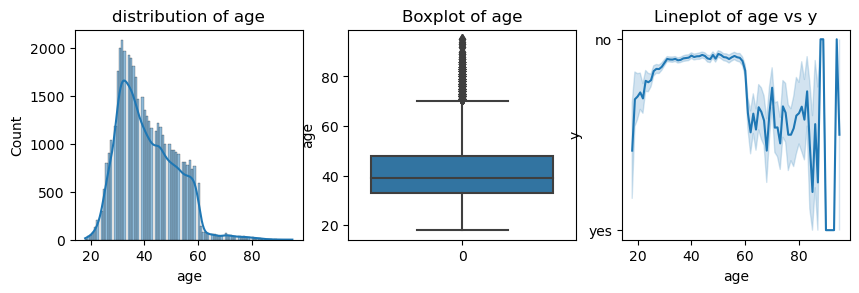

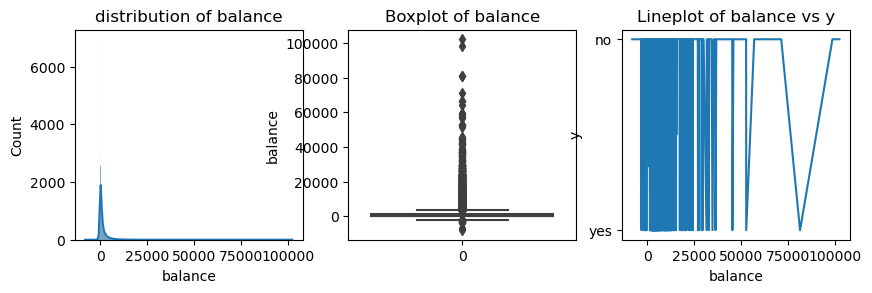

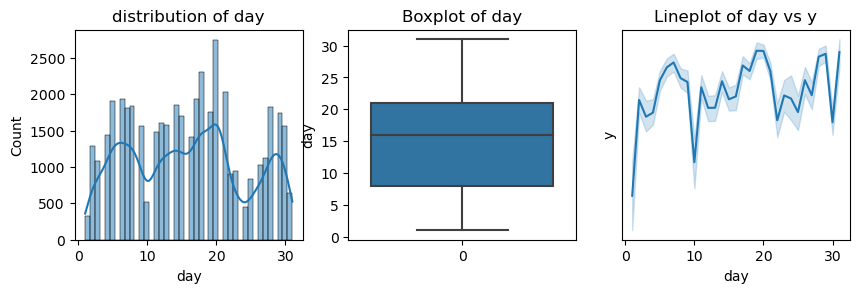

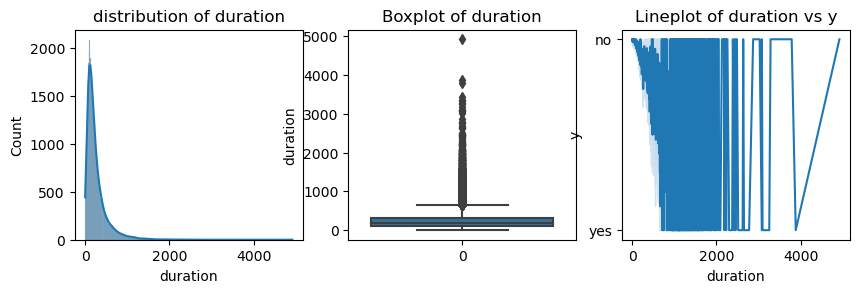

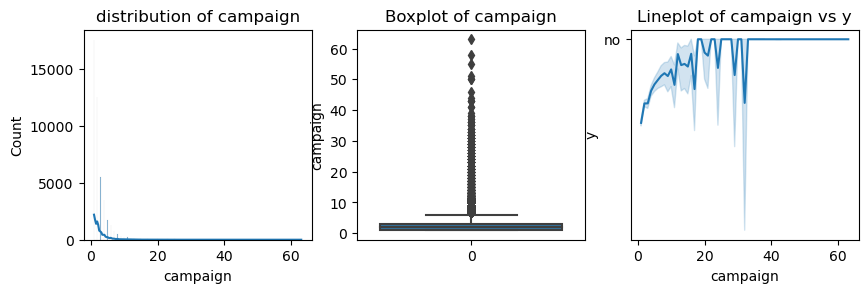

In [19]:
for i in df.columns:
    if df[i].dtype != "object":
        plt.figure(figsize=(10,6))
        
        plt.subplot(2,3,1)
        sns.histplot(df[i],kde=True)
        plt.title(f"distribution of {i}")
        
        
        plt.subplot(2,3,2)
        sns.boxplot(df[i])
        plt.ylabel(i)
        plt.title(f"Boxplot of {i}")
        
        
        plt.subplot(2,3,3)
        sns.lineplot(data=df,x=i, y="y")
        plt.title(f"Lineplot of {i} vs y")

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

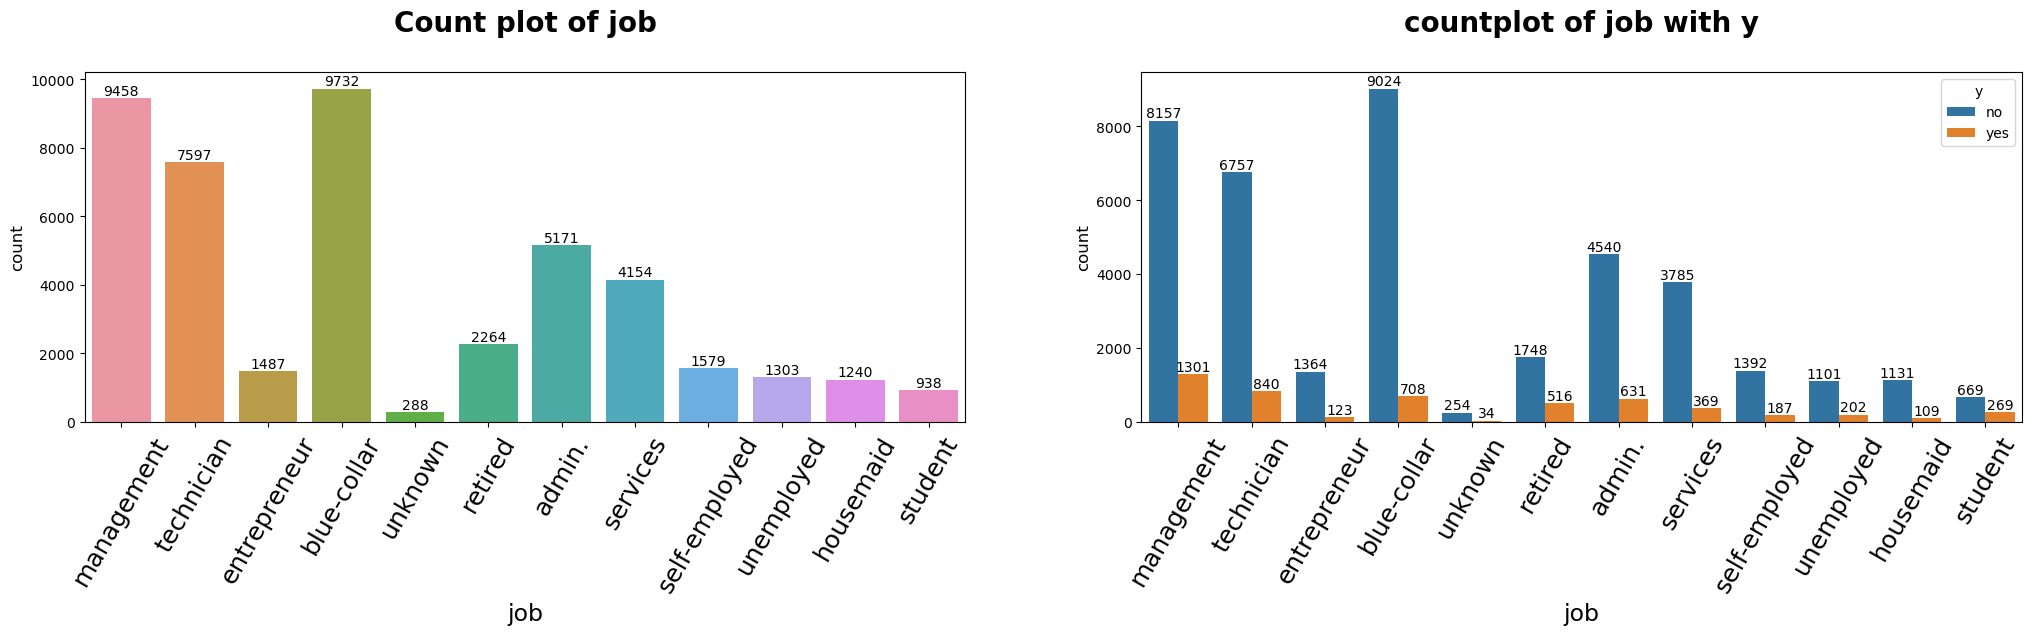

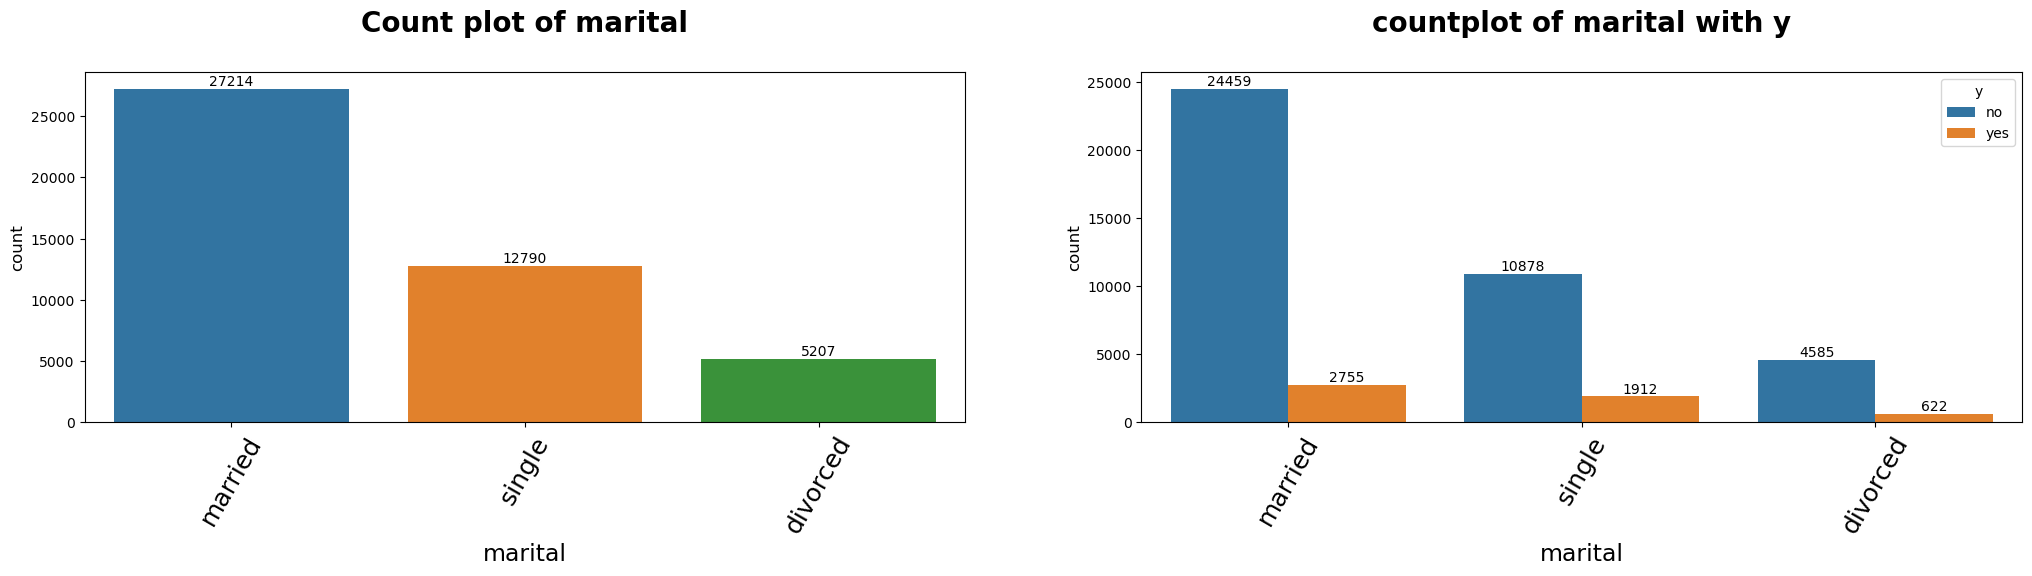

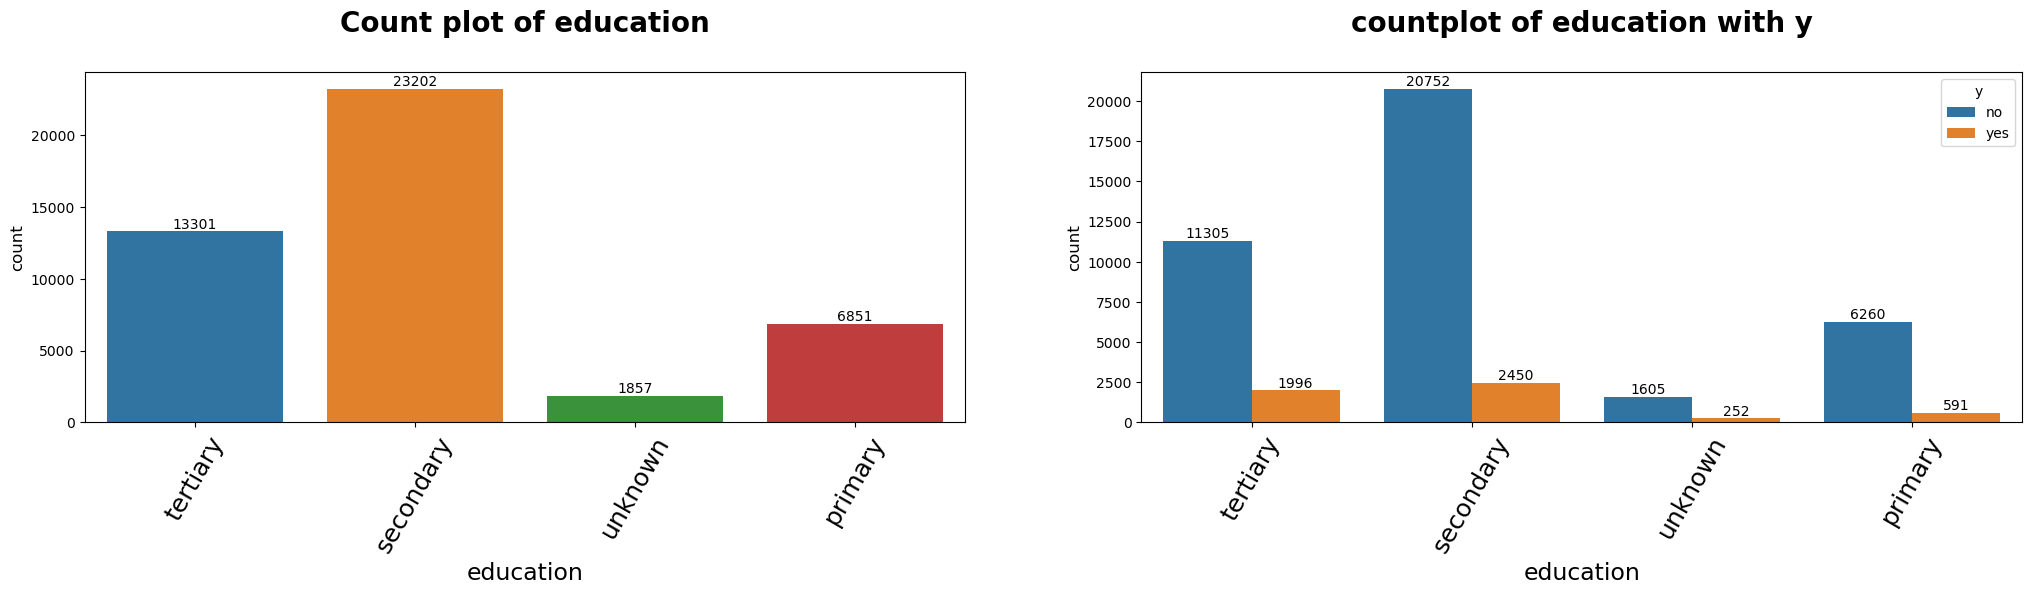

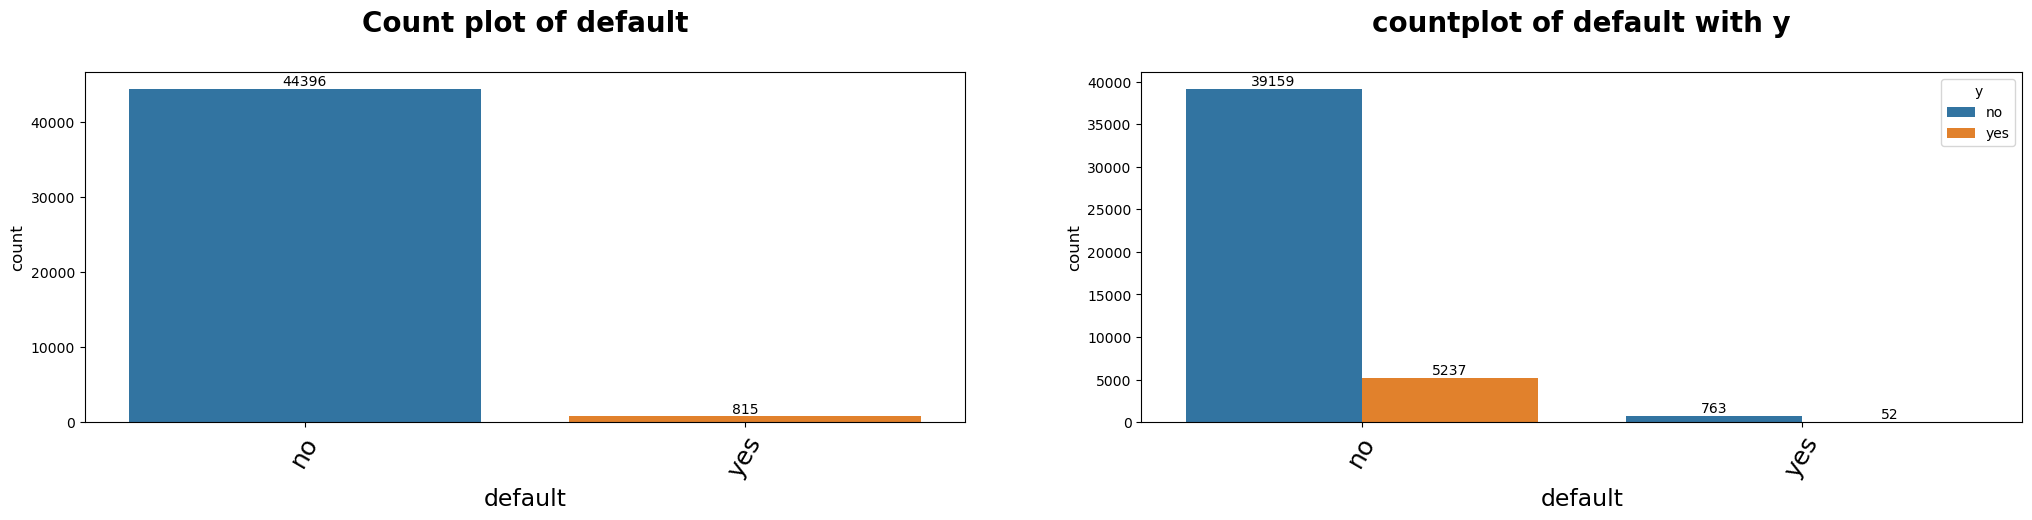

<Figure size 2500x1000 with 0 Axes>

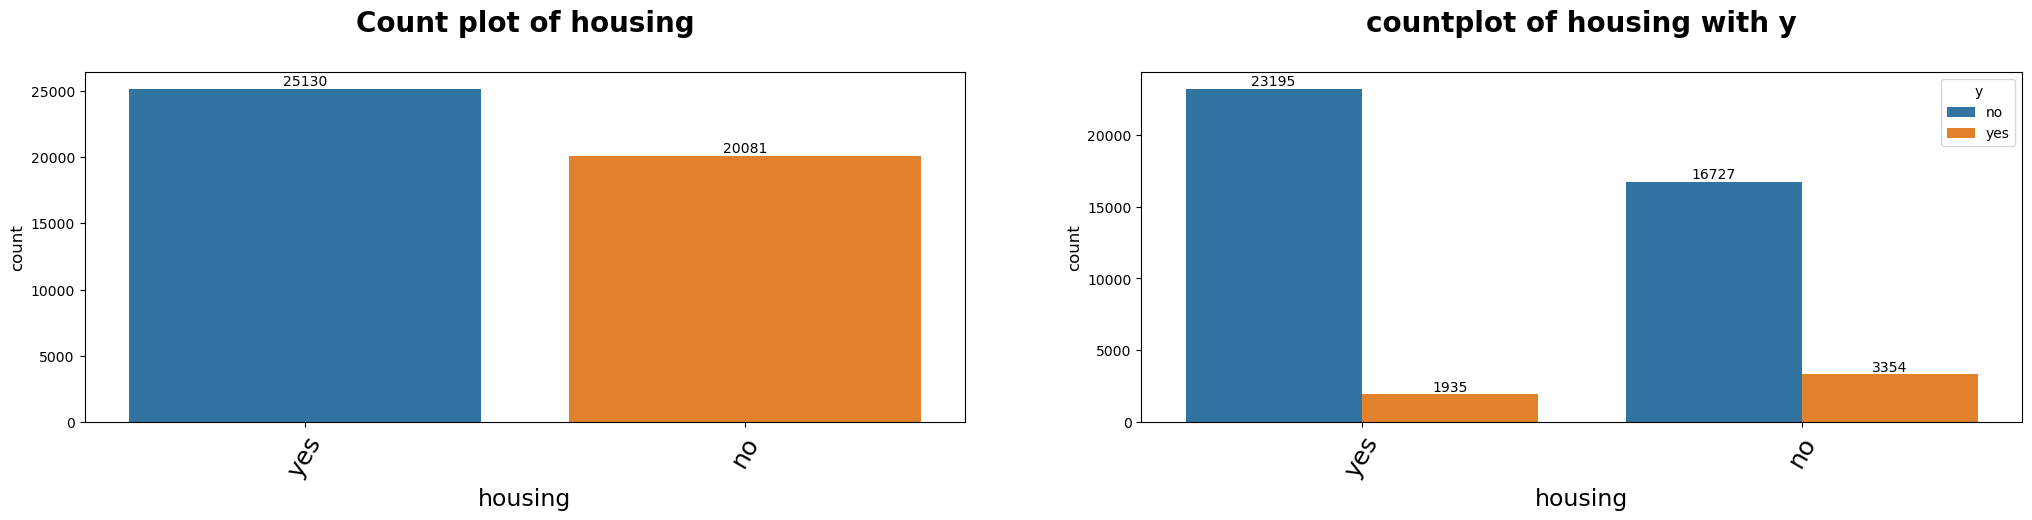

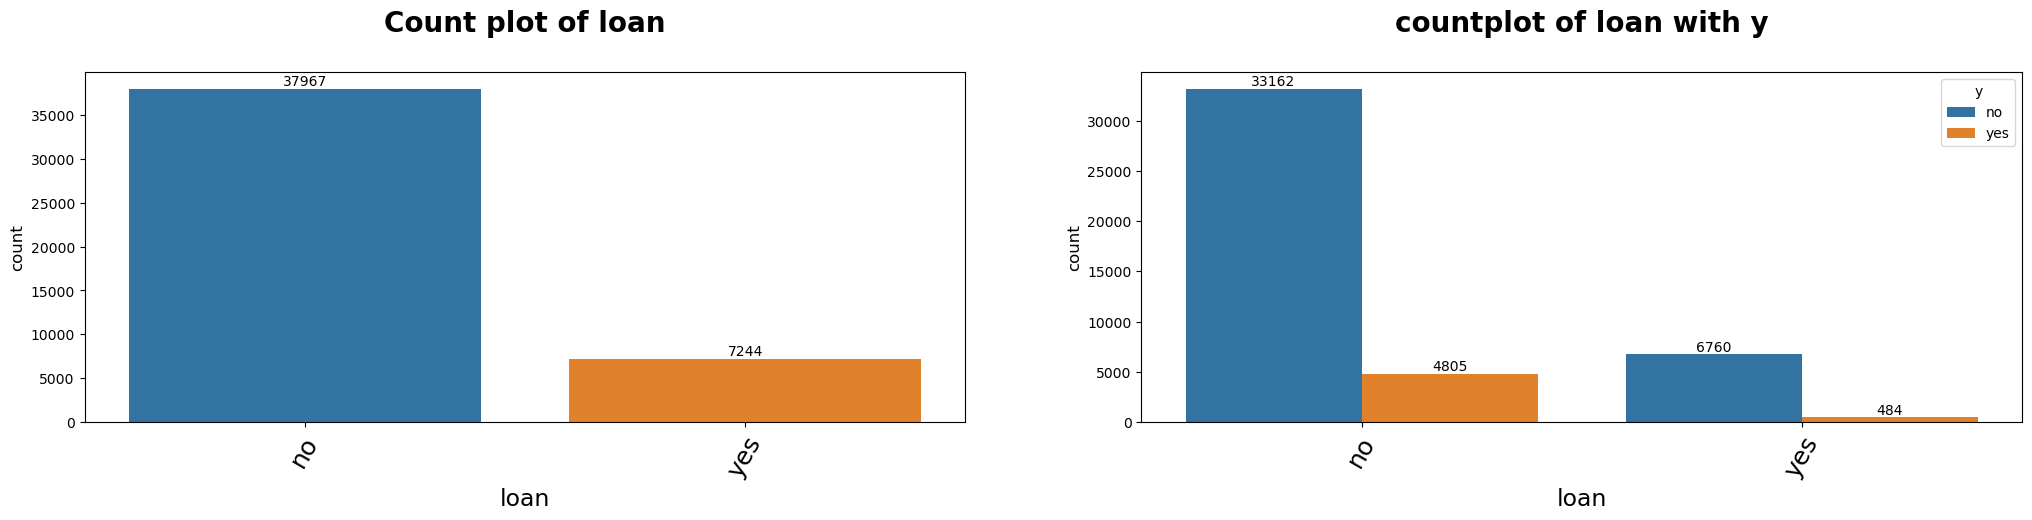

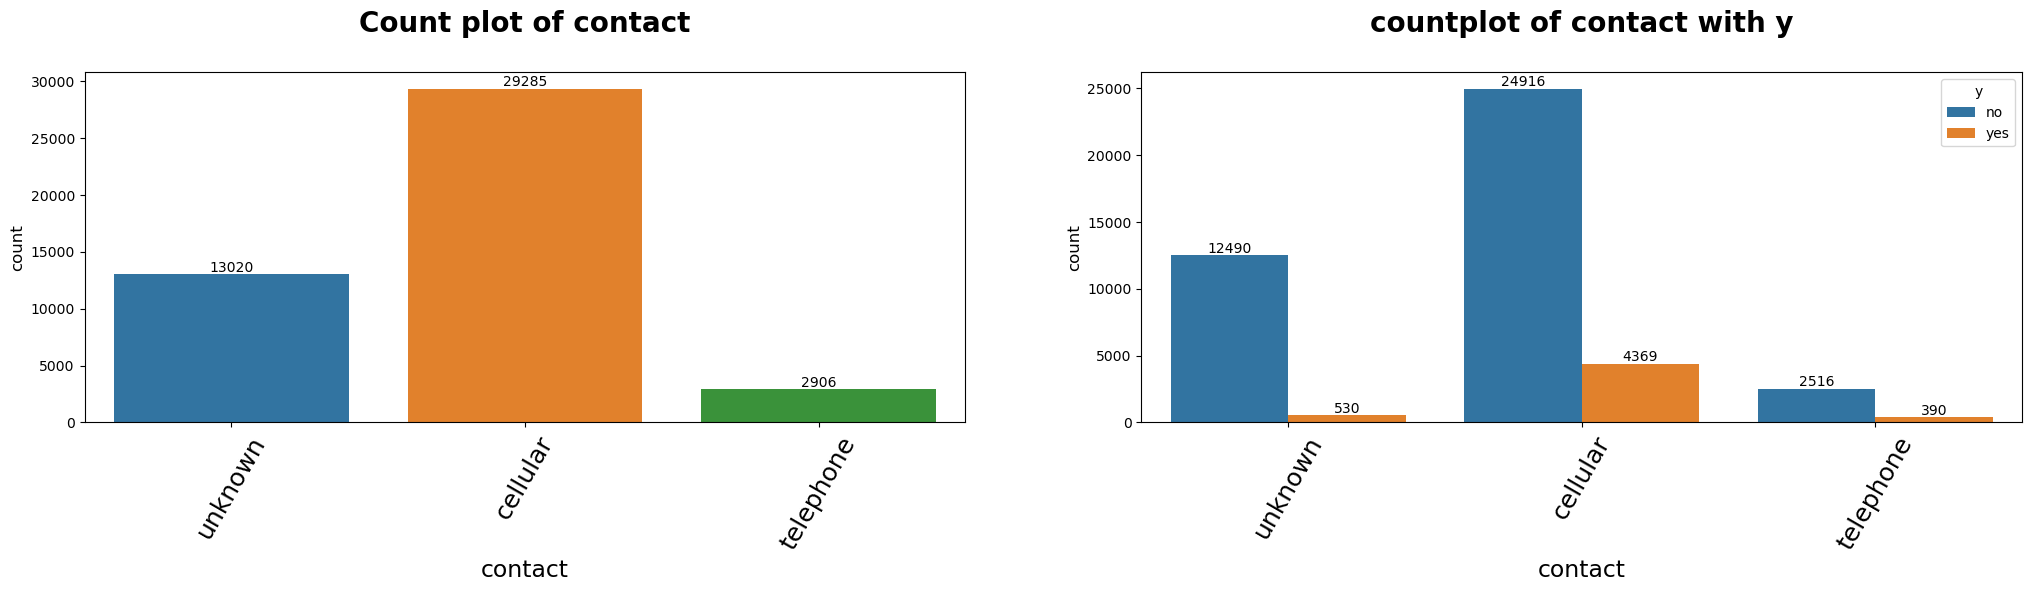

<Figure size 2500x1000 with 0 Axes>

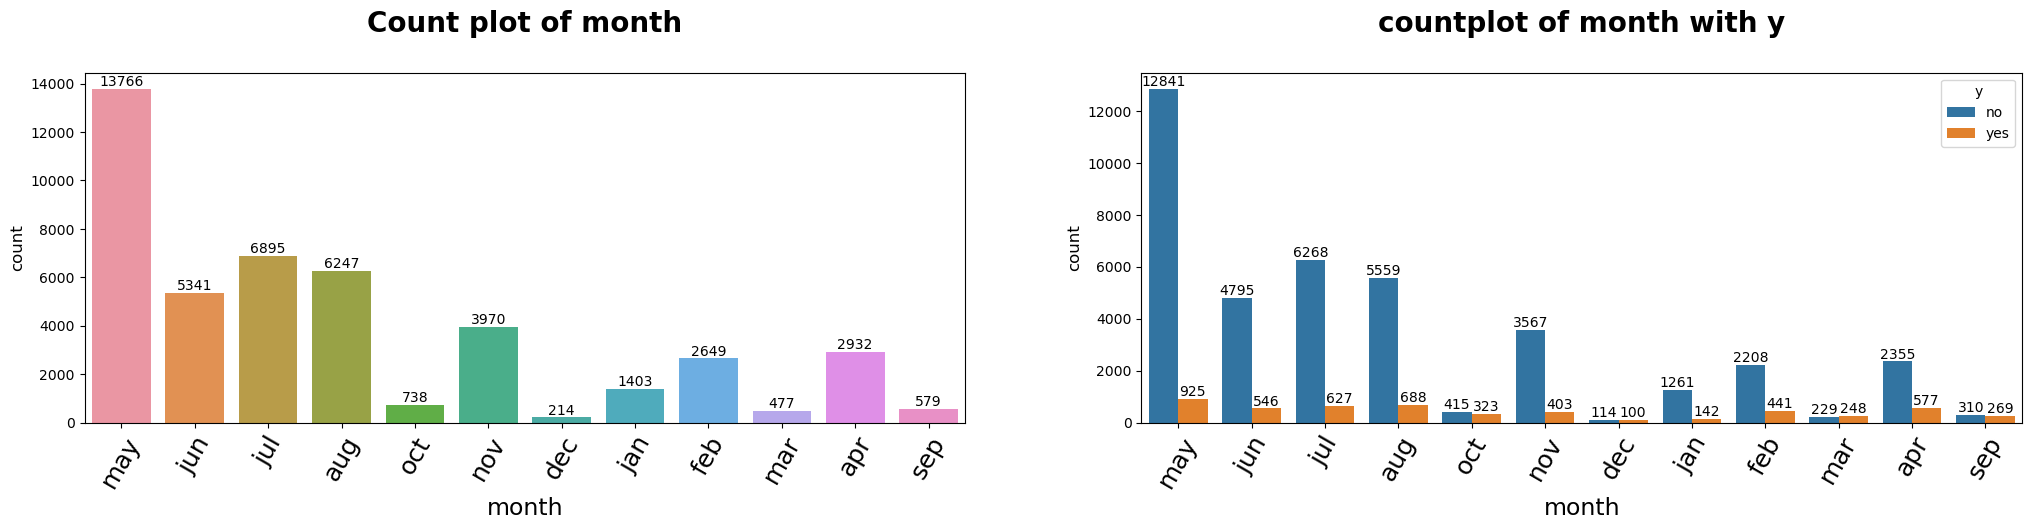

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

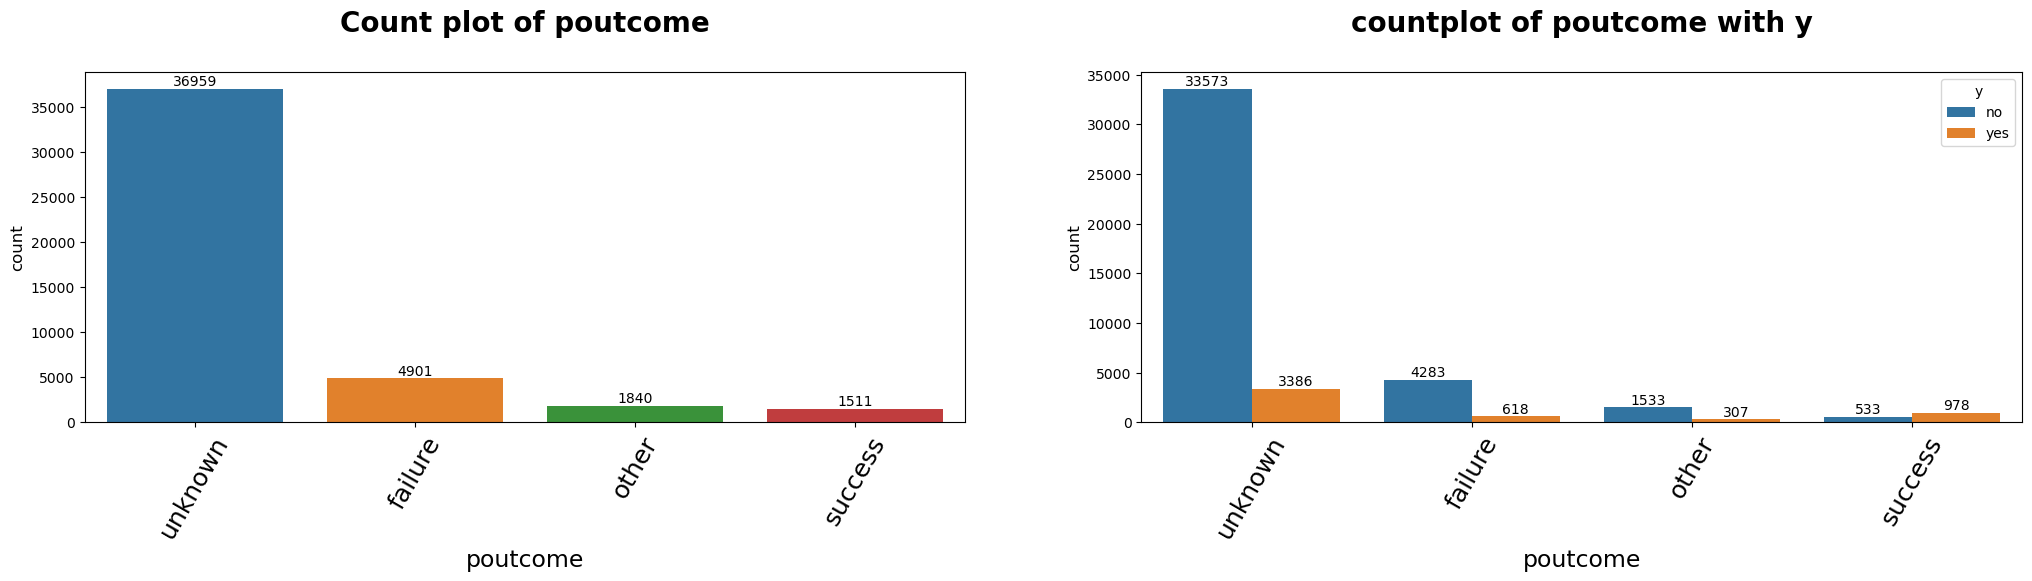

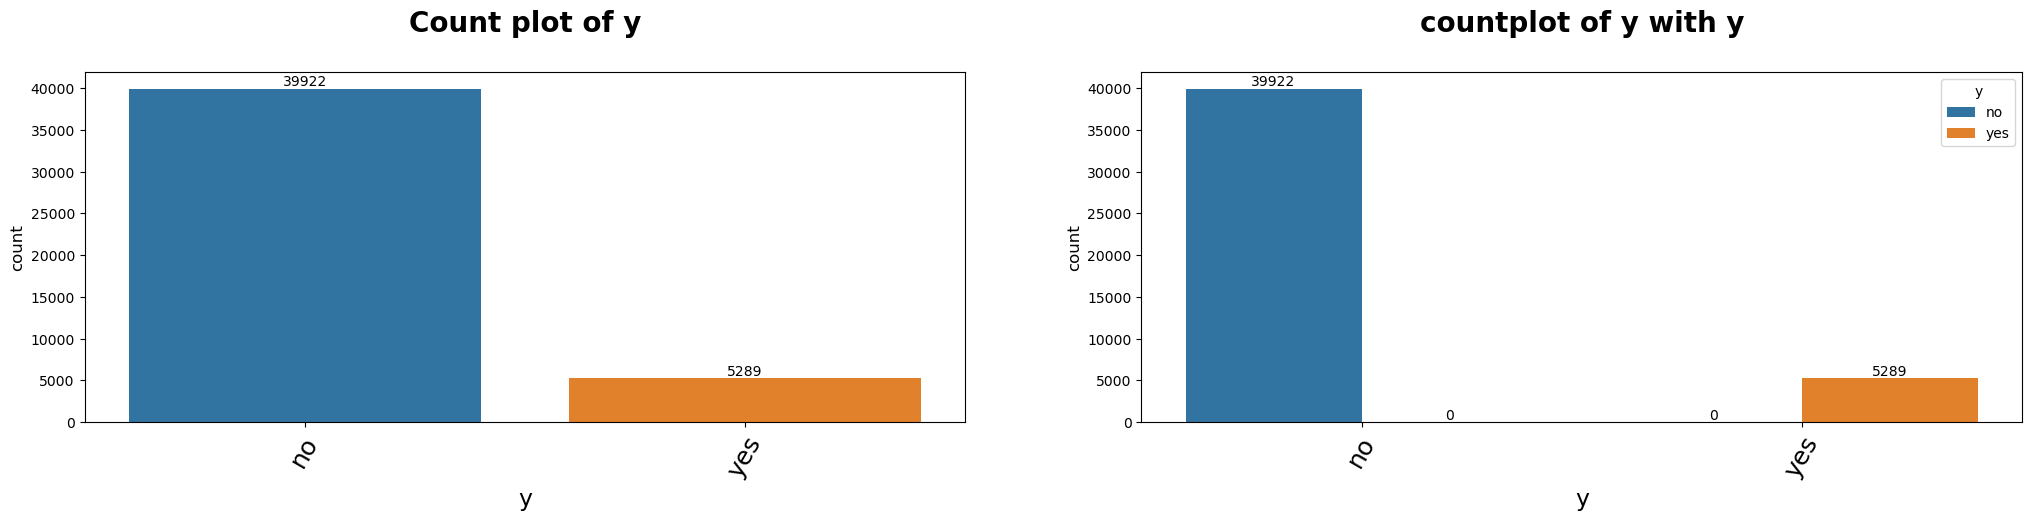

In [18]:
for i in df.columns:
    plt.figure(figsize=(25,10))
    
    if df[i].dtype == "object":
        plt.subplot(2,2,1)
        x=sns.countplot(data=df, x=i)
        for container in x.containers:
            x.bar_label(container)
        plt.xticks(rotation=60,fontsize=18)
        plt.xlabel(i,fontsize=17)
        plt.ylabel("count",fontsize=12)
        plt.title(f"Count plot of {i}\n",fontsize=20,weight="bold")
        
        print()
        plt.subplot(2,2,2)
        # Define custom colors for each category
        custom_palette = {"yes": "green", "no": "red"}

        # Create the countplot with custom colors
        v=sns.countplot(data=df,x=i,hue="y" ) # hue means legends or filter
        custom_palette = {"yes": "green", "no": "red"}
        for container in v.containers:
            v.bar_label(container)
        plt.xticks(rotation=60,fontsize=18)
        plt.xlabel(i,fontsize=17)
        plt.ylabel("count",fontsize=12)
        plt.title(f"countplot of {i} with y\n",fontsize=20,weight="bold" )
        plt.show()


# Fine and Delete the Outliers

In [14]:
# Try find the Outlier with number 3
## Z-Score Method
Upper_limit= df['duration'].mean() + 3*df['duration'].std()
Lower_limit= df['duration'].mean() - 3*df['duration'].std()
print("The Upper limit is: ", Upper_limit)
print("The Lower limit is: ", Lower_limit)

The Upper limit is:  1030.746516576982
The Lower limit is:  -514.4203570140437


In [15]:
## Find the Outliers
df.loc[(df['duration'] > Upper_limit)|(df['duration'] < Lower_limit)]

age          job   marital  education default  balance housing loan  \
37      53   technician   married  secondary      no       -3      no   no   
43      54      retired   married  secondary      no      529     yes   no   
59      46     services   married    primary      no      179     yes   no   
83      59       admin.   married  secondary      no     2343     yes   no   
86      56       admin.   married  secondary      no       45      no   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
45031   42   unemployed   married  secondary      no     1289      no   no   
45072   54   management  divorced   tertiary      no     5475      no   no   
45199   34  blue-collar    single  secondary      no     1475     yes   no   
45200   38   technician   married  secondary      no      557     yes   no   
45208   72      retired   married  secondary      no     5715      no   no   

        contact  day month  duration  campaign poutcome    y  
37      unknown    5   may      1666         1  unknown   no  
43      unknown    5   may      1492         1  unknown   no  
59      unknown    5   may      1778         1  unknown   no  
83      unknown    5   may      1042         1  unknown  yes  
86      unknown    5   may      1467         1  unknown  yes  
...         ...  ...   ...       ...       ...      ...  ...  
45031  cellular   15   oct      1176         3  success  yes  
45072  cellular   21   oct      1032         1  success  yes  
45199  cellular   16   nov      1166         3    other   no  
45200  cellular   16   nov      1556         4  unknown  yes  
45208  cellular   17   nov      1127         5  success  yes  

[963 rows x 15 columns]

In [16]:
# The length of the Outlier
new_df=df.loc[(df['duration'] < Upper_limit) & (df['duration'] > Lower_limit)]
print("The lenght of new data: ",len(new_df))
print("The lenght of old data: ",len(df))
print("number of outlier: ", len(df)-len(new_df))

The lenght of new data:  44248
The lenght of old data:  45211
number of outlier:  963


<Axes: >

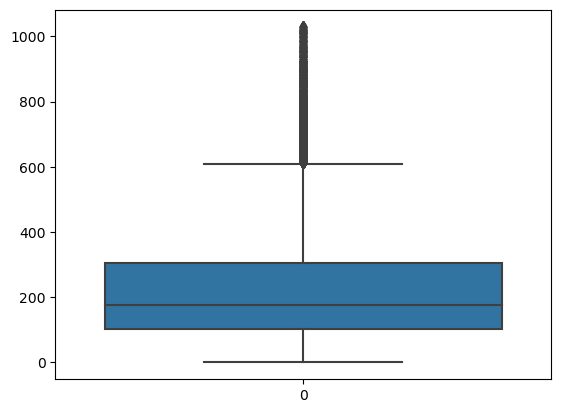

In [17]:
sns.boxplot(new_df['duration'])

In [64]:
## The difference here is the outlier going to be big
Upper= df['duration'].mean() + 2*df['duration'].std()
Lower= df['duration'].mean() - 2*df['duration'].std()
print("The Upper limit is: ", Upper)
print("The Lower limit is: ", Lower)

The Upper limit is:  773.218704311811
The Lower limit is:  -256.8925447488728


In [65]:
new_dff=df.loc[(df['duration'] < Upper) & (df['duration'] > Lower)]
print("The new data: ",len(new_dff))
print("The old data: ",len(df))
print("number of outlier: ", len(df)-len(new_dff))

The new data:  43113
The old data:  45211
number of outlier:  2098


<Axes: >

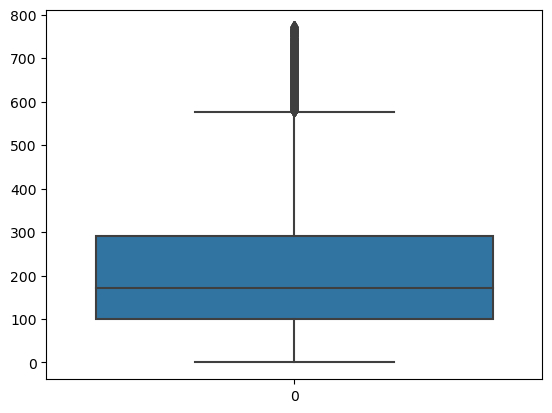

In [66]:
sns.boxplot(new_dff['duration'])

In [67]:
df['duration']=new_dff['duration']

In [68]:
## Z-Score Method
Upper= df['balance'].mean() + 2*df['balance'].std()
Lower= df['balance'].mean() - 2*df['balance'].std()
print("The Upper limit is: ", Upper)
print("The Lower limit is: ", Lower)

The Upper limit is:  7451.8037160222775
The Lower limit is:  -4727.2596006521235


In [69]:
new_df=df.loc[(df['balance'] < Upper) & (df['balance'] > Lower)]
print("The new data: ",len(new_df))
print("The old data: ",len(df))
print("number of outlier: ", len(df)-len(new_df))

The new data:  43742
The old data:  45211
number of outlier:  1469


<Axes: >

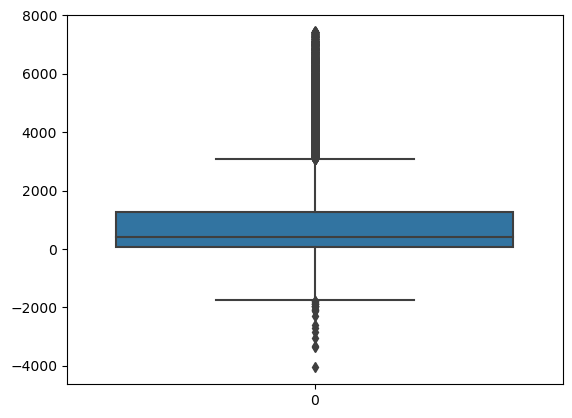

In [70]:
sns.boxplot(new_df['balance'])

In [71]:
df['balance']=new_df['balance']

In [72]:
upper=df['campaign'].mean() + 2*df['campaign'].std()
lower=df['campaign'].mean() - 2*df['campaign'].std()
print("The upper limit is: ",upper)
print("The lower limit is: ",lower)

The upper limit is:  8.959882424807327
The lower limit is:  -3.432201108313554


In [75]:
new=df.loc[(df['campaign']<upper) & (df['campaign']>lower)]
print("The lenght of new campaign is: ", len(new))
print("The lenght if the camaing lastly is: ", len(df))
print("The number of outlier are: ", len(df)-len(new))

The lenght of new campaign is:  43422
The lenght if the camaing lastly is:  45211
The number of outlier are:  1789


<Axes: >

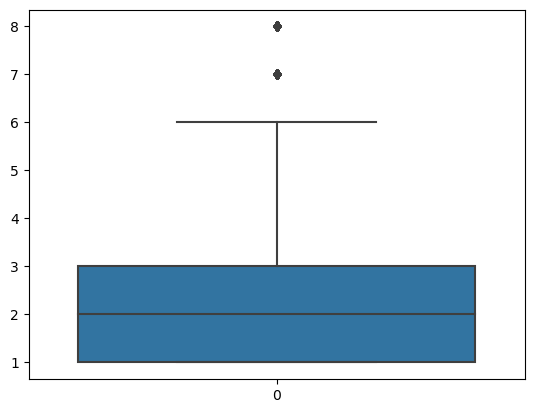

In [76]:
sns.boxplot(new['campaign'])

In [77]:
df['campaign']=new['campaign']

# Create another Excel File to save the changes

In [79]:
df.to_excel('C:\\Users\\razan\\Desktop\\Data Science\\NewTrain2.xlsx')

In [4]:
f=pd.read_excel('C:\\Users\\razan\\Desktop\\Data Science\\NewTrain2.xlsx')
df=pd.DataFrame(f)
df.head()

Unnamed: 0  age           job  marital  education default  balance housing  \
0           0   58    management  married   tertiary      no   2143.0     yes   
1           1   44    technician   single  secondary      no     29.0     yes   
2           2   33  entrepreneur  married  secondary      no      2.0     yes   
3           3   47   blue-collar  married    unknown      no   1506.0     yes   
4           4   33       unknown   single    unknown      no      1.0      no   

  loan  contact  day month  duration  campaign poutcome   y  
0   no  unknown    5   may     261.0       1.0  unknown  no  
1   no  unknown    5   may     151.0       1.0  unknown  no  
2  yes  unknown    5   may      76.0       1.0  unknown  no  
3   no  unknown    5   may      92.0       1.0  unknown  no  
4   no  unknown    5   may     198.0       1.0  unknown  no

In [6]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [3]:
print(df.isnull().any())

Unnamed: 0    False
age           False
job           False
marital       False
education     False
default       False
balance        True
housing       False
loan          False
contact       False
day           False
month         False
duration       True
campaign       True
poutcome      False
y             False
dtype: bool


In [4]:
df.isnull()

Unnamed: 0    age    job  marital  education  default  balance  \
0           False  False  False    False      False    False    False   
1           False  False  False    False      False    False    False   
2           False  False  False    False      False    False    False   
3           False  False  False    False      False    False    False   
4           False  False  False    False      False    False    False   
...           ...    ...    ...      ...        ...      ...      ...   
45206       False  False  False    False      False    False    False   
45207       False  False  False    False      False    False    False   
45208       False  False  False    False      False    False    False   
45209       False  False  False    False      False    False    False   
45210       False  False  False    False      False    False    False   

       housing   loan  contact    day  month  duration  campaign  poutcome  \
0        False  False    False  False  False     False     False     False   
1        False  False    False  False  False     False     False     False   
2        False  False    False  False  False     False     False     False   
3        False  False    False  False  False     False     False     False   
4        False  False    False  False  False     False     False     False   
...        ...    ...      ...    ...    ...       ...       ...       ...   
45206    False  False    False  False  False      True     False     False   
45207    False  False    False  False  False     False     False     False   
45208    False  False    False  False  False      True     False     False   
45209    False  False    False  False  False     False     False     False   
45210    False  False    False  False  False     False     False     False   

           y  
0      False  
1      False  
2      False  
3      False  
4      False  
...      ...  
45206  False  
45207  False  
45208  False  
45209  False  
45210  False  

[45211 rows x 16 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  45211 non-null  int64  
 1   age         45211 non-null  int64  
 2   job         45211 non-null  object 
 3   marital     45211 non-null  object 
 4   education   45211 non-null  object 
 5   default     45211 non-null  object 
 6   balance     43742 non-null  float64
 7   housing     45211 non-null  object 
 8   loan        45211 non-null  object 
 9   contact     45211 non-null  object 
 10  day         45211 non-null  int64  
 11  month       45211 non-null  object 
 12  duration    43113 non-null  float64
 13  campaign    43422 non-null  float64
 14  poutcome    45211 non-null  object 
 15  y           45211 non-null  object 
dtypes: float64(3), int64(3), object(10)
memory usage: 5.5+ MB


In [6]:
df.shape

(45211, 16)

In [47]:
# This is for fill the null value with 0
df.fillna(0, inplace=True)

In [85]:
# This is for remove
new=df.dropna()
new

Unnamed: 0  age           job   marital  education default  balance  \
0               0   58    management   married   tertiary      no   2143.0   
1               1   44    technician    single  secondary      no     29.0   
2               2   33  entrepreneur   married  secondary      no      2.0   
3               3   47   blue-collar   married    unknown      no   1506.0   
4               4   33       unknown    single    unknown      no      1.0   
...           ...  ...           ...       ...        ...     ...      ...   
45204       45204   73       retired   married  secondary      no   2850.0   
45205       45205   25    technician    single  secondary      no    505.0   
45207       45207   71       retired  divorced    primary      no   1729.0   
45209       45209   57   blue-collar   married  secondary      no    668.0   
45210       45210   37  entrepreneur   married  secondary      no   2971.0   

      housing loan    contact  day month  duration  campaign poutcome    y  
0         yes   no    unknown    5   may     261.0       1.0  unknown   no  
1         yes   no    unknown    5   may     151.0       1.0  unknown   no  
2         yes  yes    unknown    5   may      76.0       1.0  unknown   no  
3         yes   no    unknown    5   may      92.0       1.0  unknown   no  
4          no   no    unknown    5   may     198.0       1.0  unknown   no  
...       ...  ...        ...  ...   ...       ...       ...      ...  ...  
45204      no   no   cellular   17   nov     300.0       1.0  failure  yes  
45205      no  yes   cellular   17   nov     386.0       2.0  unknown  yes  
45207      no   no   cellular   17   nov     456.0       2.0  unknown  yes  
45209      no   no  telephone   17   nov     508.0       4.0  unknown   no  
45210      no   no   cellular   17   nov     361.0       2.0    other   no  

[40049 rows x 16 columns]

In [86]:
new.shape

(40049, 16)

## Replace empty value with mean

In [6]:
for i in df.columns:
    if df[i].isnull().values.any():
        df[i].fillna(df[i].mean(), inplace=True)
df.shape

(45211, 16)

In [7]:
df.tail()

Unnamed: 0  age           job   marital  education default  balance  \
45206       45206   51    technician   married   tertiary      no    825.0   
45207       45207   71       retired  divorced    primary      no   1729.0   
45208       45208   72       retired   married  secondary      no   5715.0   
45209       45209   57   blue-collar   married  secondary      no    668.0   
45210       45210   37  entrepreneur   married  secondary      no   2971.0   

      housing loan    contact  day month    duration  campaign poutcome    y  
45206      no   no   cellular   17   nov  216.672605       3.0  unknown  yes  
45207      no   no   cellular   17   nov  456.000000       2.0  unknown  yes  
45208      no   no   cellular   17   nov  216.672605       5.0  success  yes  
45209      no   no  telephone   17   nov  508.000000       4.0  unknown   no  
45210      no   no   cellular   17   nov  361.000000       2.0    other   no

In [9]:
df['duration'].mean()

216.67260455083152

<Axes: xlabel='duration', ylabel='Count'>

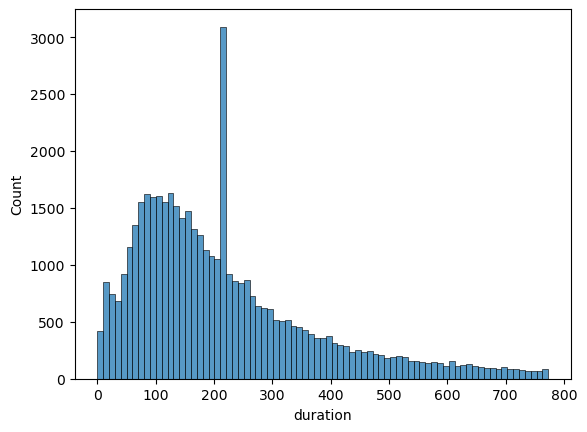

In [96]:
sns.histplot(df['duration']) 

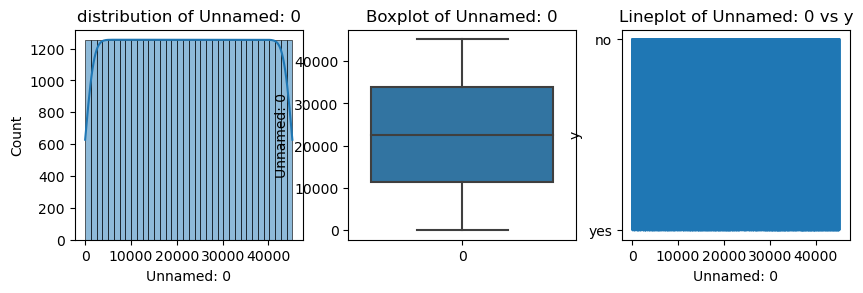

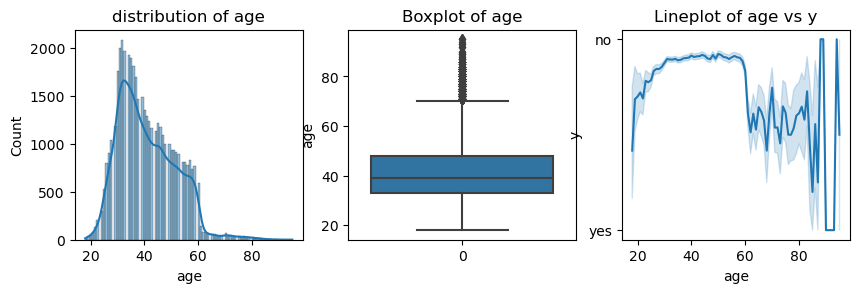

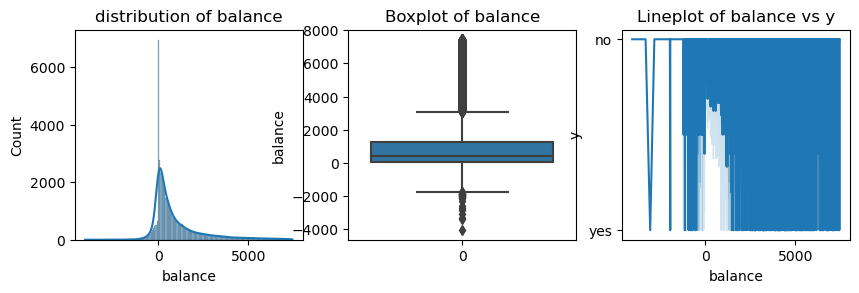

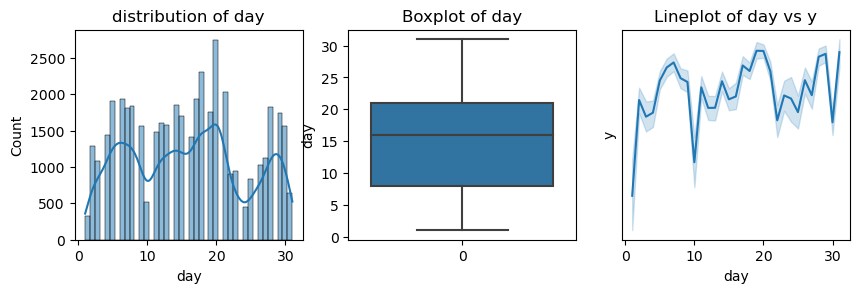

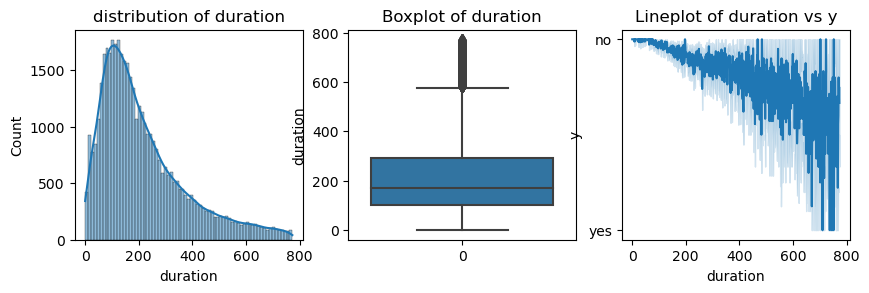

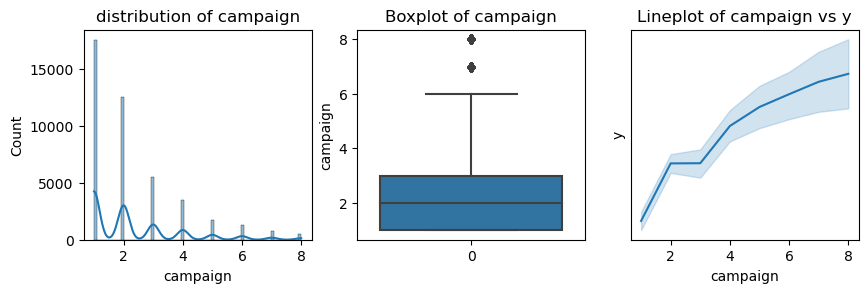

In [7]:
for i in df.columns:
    if df[i].dtype != "object":
        plt.figure(figsize=(10,6))
        
        plt.subplot(2,3,1)
        sns.histplot(df[i],kde=True)
        plt.title(f"distribution of {i}")
        
        
        plt.subplot(2,3,2)
        sns.boxplot(df[i])
        plt.ylabel(i)
        plt.title(f"Boxplot of {i}")
        
        
        plt.subplot(2,3,3)
        sns.lineplot(data=df,x=i, y="y")
        plt.title(f"Lineplot of {i} vs y")

# Step 4: Feature Relationships
    - Scatterplot
    - HeatMap Correlation 
    - Pairplot

C:\Users\razan\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


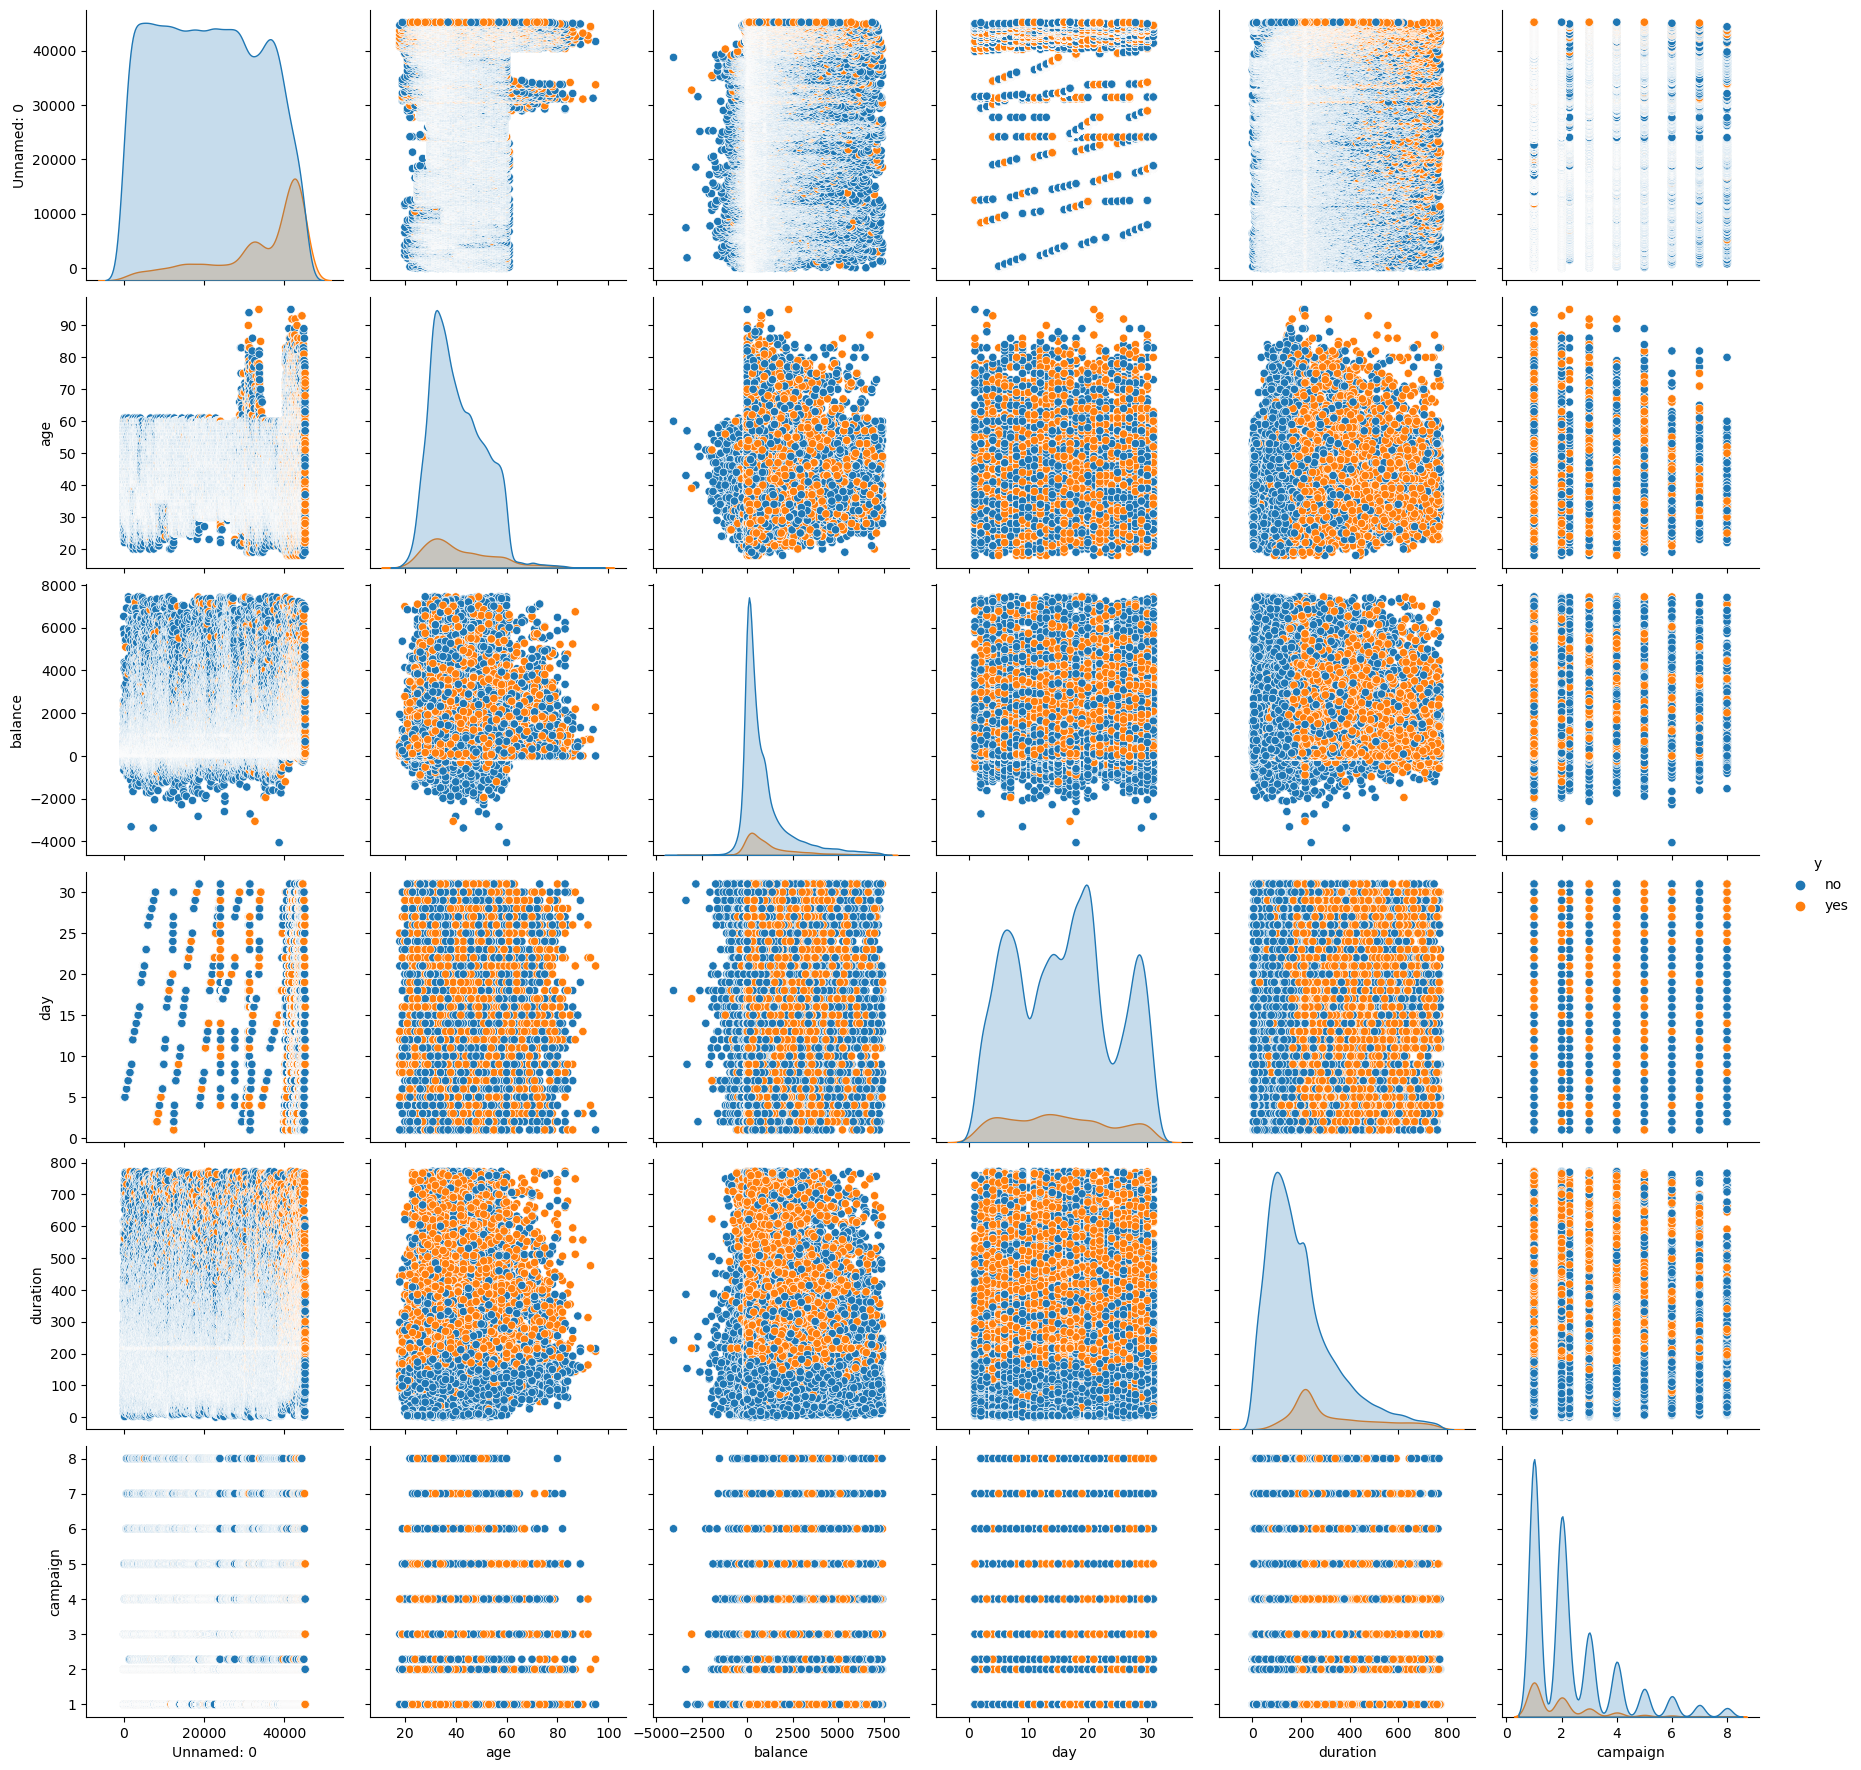

In [12]:
#sns.set_style("whitegrd")
sns.pairplot(df,hue="y",size=3);
plt.show()

(0.0, 8026.4)

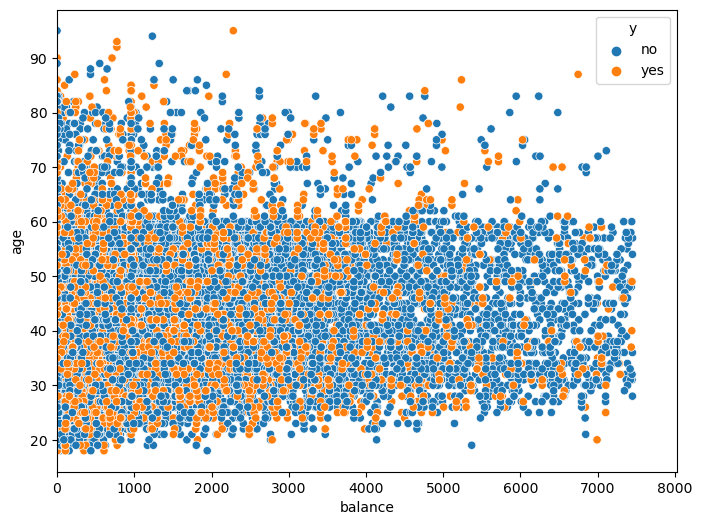

In [16]:
plt.figure(figsize=(8, 6))

# Create the scatter plot
sns.scatterplot(data=df, y='age', x='balance' , hue='y')

# Set the limit of y-axis to start from 0
plt.xlim(0, None)

In [48]:
#df.to_excel('NewTrain.xlsx', index=True) # يغير لي الفايل الاصلي بمعنى المصدر

In [12]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column except the index
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

print(df.head())

   Unnamed: 0  age  job  marital  education  default  balance  housing  loan  \
0           0   40    4        1          2        0     3034        1     0   
1           1   26    9        2          1        0      943        1     0   
2           2   15    2        1          1        0      916        1     1   
3           3   29    1        1          3        0     2418        1     0   
4           4   15   11        2          3        0      915        0     0   

   contact  day  month  duration  campaign  poutcome  y  
0        2    4      8       261         0         3  0  
1        2    4      8       151         0         3  0  
2        2    4      8        76         0         3  0  
3        2    4      8        92         0         3  0  
4        2    4      8       198         0         3  0  


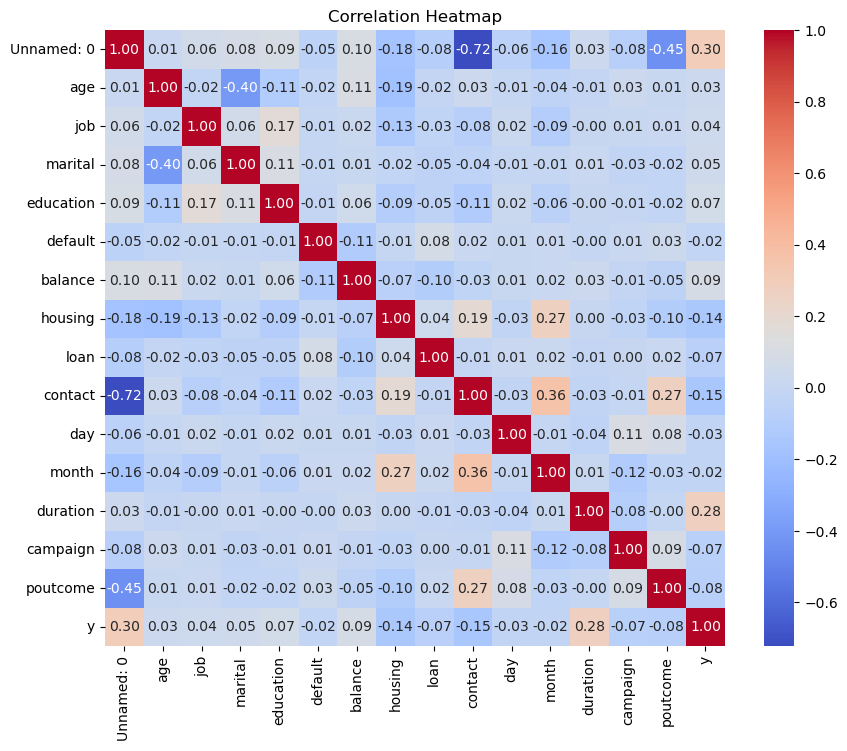

In [98]:
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

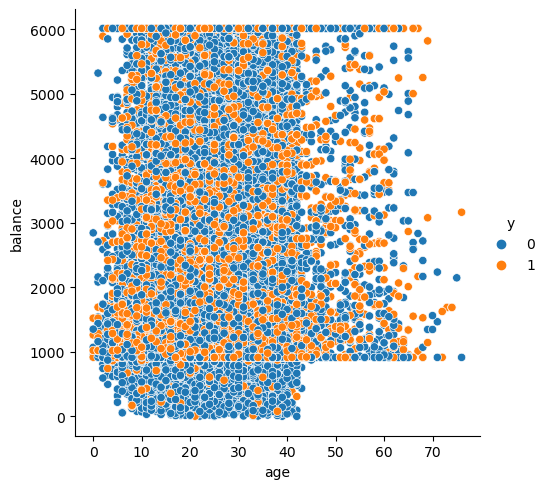

In [32]:
sns.relplot(data= df, x='age' ,y='balance' , hue='y') #hue: means legend #style= a shape or icon #size= small or big 
#col= يفصل لي الرسمه الى عدد القيم الموجوده في هذا العامود

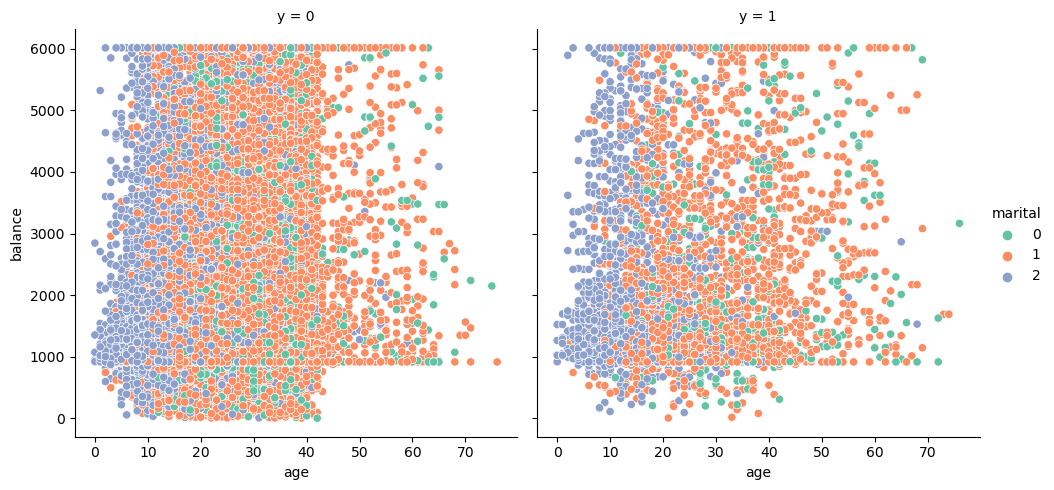

In [74]:
sns.relplot(data= df, x='age' ,y='balance' , col='y' , palette= 'Set2'
            ,hue="marital")

# Check for Imbalanced data

In [12]:
df['y'].value_counts() # How many No and Yes.

0    39922
1     5289
Name: y, dtype: int64

In [100]:
print(sorted(Counter(df['y']).items())) # The benefit of import Counter class up

[(0, 39922), (1, 5289)]


In [14]:
from sklearn.model_selection import train_test_split #This function is commonly used to split a dataset into training 70% and testing 30% subsets for machine learning.
x=df.iloc[:,:-1]
y=df['y']

In [102]:
x_train,x_test, y_train,y_test = \
train_test_split(x,y,test_size=0.30,random_state=101)

### Try the model without solving the Imbalanced problem to check the evaluation using LogisticRegression model

In [37]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)

C:\Users\razan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
from sklearn.metrics import classification_report
report = classification_report( y_test, predictions )
print(report)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     11966
           1       0.48      0.19      0.27      1598

    accuracy                           0.88     13564
   macro avg       0.69      0.58      0.60     13564
weighted avg       0.85      0.88      0.86     13564



## Refresh the data to solve the imbalanced problem first

In [37]:
# That is means we can do both approach, The Over sampling and Under Sampling
from imblearn import under_sampling, over_sampling

In [40]:
#assign feature and target varaible
x= df.iloc[:,:-1] #used in pandas to select all rows and all columns except for the last column of a DataFrame.
y=df['y'] # output
x.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'poutcome'],
      dtype='object')

In [15]:
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(random_state=0)#The random_state parameter is set to 0 to ensure reproducibility of the random oversampling process.
x_resampled,y_resampled = rus.fit_resample(x,y)
print(sorted(Counter(y_resampled).items()), y_resampled.shape)#fit_resample() method of the RandomOverSampler class, you resample both the features and the target variable together. The resampling process ensures that the class distribution in the target variable is balanced while maintaining the corresponding features.
#The fit_resample() method applies random oversampling to balance the class distribution.
#It returns the resampled features (x_resampled) and target (y_resampled) arrays.

[(0, 39922), (1, 39922)] (79844,)


In [16]:
x_train,x_test, y_train,y_test = \
train_test_split(x_resampled,y_resampled,test_size=0.3,random_state=42)

In [17]:
x_resampled.shape 

(79844, 15)

In [110]:
y_resampled.shape

(79844,)

In [112]:
# now after solving the imbalanced problem I can try the model
model=LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)

C:\Users\razan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
from sklearn.metrics import classification_report
report = classification_report( y_test, predictions )
print(report)

              precision    recall  f1-score   support

           0       0.74      0.66      0.70     11973
           1       0.70      0.77      0.73     11981

    accuracy                           0.72     23954
   macro avg       0.72      0.72      0.72     23954
weighted avg       0.72      0.72      0.72     23954



In [115]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=0)
x_resampled2,y_resampled2 = ros.fit_resample(x,y)
print(sorted(Counter(y_resampled2).items()),y_resampled2.shape)

[(0, 5289), (1, 5289)] (10578,)


In [116]:
from sklearn.model_selection import train_test_split#This function is commonly used to split a dataset into training 70% and testing 30% subsets for machine learning.
x_train,x_test, y_train,y_test = \
train_test_split(x_resampled2,y_resampled2,test_size=0.3,random_state=101)

In [120]:
x_resampled2.shape

(10578, 15)

In [117]:
model=LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)

C:\Users\razan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:
from sklearn.metrics import classification_report
report2 = classification_report( y_test, predictions )
print(report2)

              precision    recall  f1-score   support

           0       0.76      0.64      0.69      1581
           1       0.69      0.80      0.74      1593

    accuracy                           0.72      3174
   macro avg       0.73      0.72      0.72      3174
weighted avg       0.73      0.72      0.72      3174



# KNN algorithm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  #is a machine learning model used for classification tasks based on the k-Nearest Neighbors algorithm.(KN
x=df.iloc[:,:-1]
y=df['y']

In [18]:
from sklearn.neighbors import KNeighborsClassifier #is a machine learning model used for classification tasks based on the k-Nearest Neighbors algorithm.(KNN)
model = KNeighborsClassifier()#an object from KNN Clasifier
model.fit(x_train,y_train)#This method takes those Labels as input and learns from the training data to build the model.
y_predict = model.predict(x_test)#بعد ماتدربت المودل راح تاخذ الانبوت وتطلع لها الاوتبوت الي توقعته بعد التدريب#This method takes the test features (X_test) as input and returns the predicted labels (y_predict) for those features

In [20]:
from sklearn.metrics import classification_report
report3 = classification_report( y_test, y_predict )
print(report3)
#سؤال مهم هل كل القورثم تتغير نسبه الدقه لديها اعتماد على نوع البيانات؟ 
#بمعنى هل لازم كل مره في Classification اجرب كل القورثم عشان اتأكد من الايفالويشن؟

              precision    recall  f1-score   support

           0       0.97      0.79      0.87     11973
           1       0.82      0.97      0.89     11981

    accuracy                           0.88     23954
   macro avg       0.89      0.88      0.88     23954
weighted avg       0.89      0.88      0.88     23954



# Decision Trees

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
x=df.iloc[:,:-1]
y=df['y']

In [14]:
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(random_state=0)#The random_state parameter is set to 0 to ensure reproducibility of the random oversampling process.
x_resampled_Tree,y_resampled_Tree = rus.fit_resample(x,y)
print(sorted(Counter(y_resampled_Tree).items()), y_resampled_Tree.shape)#fit_resample() method of the RandomOverSampler class, you resample both the features and the target variable together. The resampling process ensures that the class distribution in the target variable is balanced while maintaining the corresponding features.
#The fit_resample() method applies random oversampling to balance the class distribution.
#It returns the resampled features (x_resampled) and target (y_resampled) arrays.

[(0, 39922), (1, 39922)] (79844,)


In [15]:
x_train,x_test, y_train,y_test = \
train_test_split(x_resampled_Tree,y_resampled_Tree,test_size=0.3,random_state=101)

In [16]:
Tree=DecisionTreeClassifier()
Tree.fit(x_train,y_train)
predict_Tree=Tree.predict(x_test)

In [17]:
from sklearn.metrics import classification_report
report4 = classification_report(y_test,predict_Tree)
print(report4)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     11956
           1       0.93      1.00      0.96     11998

    accuracy                           0.96     23954
   macro avg       0.96      0.96      0.96     23954
weighted avg       0.96      0.96      0.96     23954



# Save the best Eval model

In [18]:
import pickle
pickle.dump(Tree, open("TreeModel","wb"))

In [19]:
pwd|

'C:\\Users\\razan\\Desktop\\Data Science'

In [20]:
loaded_model=pickle.load(open("TreeModel","rb"))

In [21]:
predict_TreeNew=loaded_model.predict(x_test)

In [22]:
# for testing only that is saved and work
report5= classification_report(y_test,predict_TreeNew)
print(report5)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     11956
           1       0.93      1.00      0.96     11998

    accuracy                           0.96     23954
   macro avg       0.96      0.96      0.96     23954
weighted avg       0.96      0.96      0.96     23954



## Conclusion:
Having completed the aforementioned procedures, we now understand our data, prepare it, and comprehend its aspects as well as their relationships.
then once the data is prepared by addressing issues like outliers and imbalanced data, we may attempt to forecast and classify

the result, which is now prepared for consideration based on the model and the evaluation.
After our many attempts eval, we concluded that the best model was DecisionTreeClassifier.